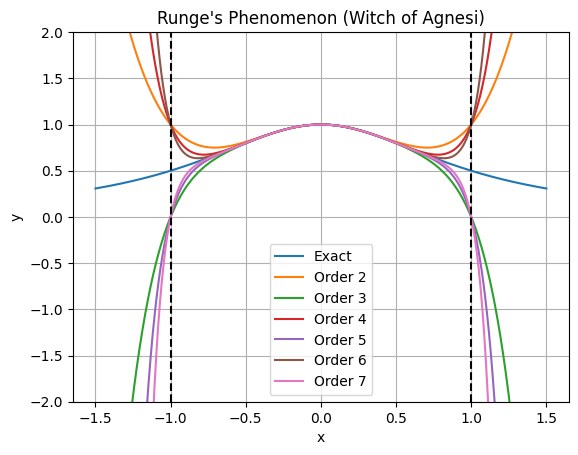

In [11]:
"""agnesi_witch.ipynb"""

# Cell 1

import typing
import numpy as np
import matplotlib.pyplot as plt

if typing.TYPE_CHECKING:
    from matplotlib.axes import Axes


# Agnesi Witch function with a=1/2 is y=1/(x^2+1) 
# https://en.wikipedia.org/wiki/Witch_of_Agnesi
def agnesi_witch(x: np.float_) -> np.float_:
    """ This function defines the exact value for Witch of Agnesi """
    return 1 / (x**2 + 1)
    
# Initially attempted to use sympy's built-in power series, however only odd orders of the power
# series would plot as lines. Other lines were excluded (the even orders). 
# This may be because it is an odd function?
# Used chatGPT to help create a power series function. 7/4/2023
def f(x: np.float_, n: int) -> np.float_:
    """ This function defines the power series for 1 / (x**2 + 1)"""
    # Initializing an array to zero
    power_series = np.zeros_like(x)
    # Iterating from i to n inclusive for each order of the power series
    for i in range(n + 1):
        # Iterates using power series formula for Agnesi's function
        power_series += (-1)**i * x**(2*i)
    # returns the array with values 
    return power_series

def plot(ax: plt.Axes) -> None:
    """ This function plots all orders of the power series and the exact Agnesi function""" 
    # The range of x from -1.5 < x < 1.5
    x: np.float_ = np.linspace(-1.5, 1.5, 1000, dtype=np.float_)

    # Defining a range of integers from 2 to 7 inclusive
    nth_orders: int = range(2, 8)

    # plotting the exact value of the agnesi_witch function
    ax.plot(x, agnesi_witch(x), label="Exact")

    # Plotting the power series function and assigning the respective orders to the lines
    for n in nth_orders:
        ax.plot(x, f(x, n), label=f"Order {n}")

    # asymptote lines where all f(x) intersect at 1 and -1
    ax.axvline(x=-1, color='black', linestyle='--')
    ax.axvline(x=1, color='black', linestyle='--')

    # Customizing the graph in reference to Session 12-C example
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title("Runge's Phenomenon (Witch of Agnesi)")
    ax.legend()
    ax.grid(True)
    ax.set_ylim(-2, 2)

def main() -> None: 
    plt.figure()
    plot(plt.axes())
    plt.show()

if __name__ == "__main__":
    main()

The Witch of Agnesi demonstrates Runge's Phenomenon because as there is an increase in higher-order polynomials, it does not increase in accuracy and diverges quickly. When changing the domain from -i<=x<=i, the simplified Witch of Agnesi divides by zero and undefined. 